Curve fitting with sympy from first principles 
=========

Say we are given a list on 20 data points:

In [1]:

data = [
  (1.36, 3.18),
  (1.19, 0.13),
  (2.95, 10.54),
  (2.84, 9.59),
  (0.44, -1.69),
  (2.83, 6.43),
  (1.39, 0.13),
  (1.88, 2.32),
  (1.23, -0.41),
  (0.92, -0.11),
  (0.97, 1.14),
  (2.19, 4.05),
  (2.02, 4.39),
  (2.48, 5.54),
  (1.2, 0.94),
  (0.22, -0.92),
  (0.3, 1.8),
  (1.02, 1.4),
  (0.07, 0.94),
  (2.82, 6.72),
]

Let's visualize our data on a scatter plot:


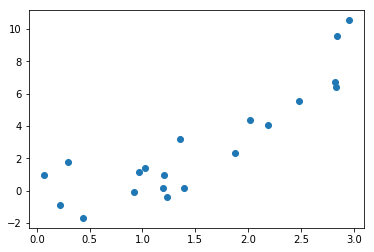

In [2]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax = plt.figure(), plt.axes()

dataX, dataY = zip(*data)
ax.plot(dataX, dataY, "o")

plt.show()


 We want to fit a curve through these data points
 as closely as possible.
 
  First, we need to choose a type of curve
 before we can start fitting it to the data.
 Let's assume that we want to fit the graph of 
 the following function to our data:
 $f(x) := ax^2 + bx +c$
 
  Now, we need to find numbers the paremeters a,b and c 
 so that the curve matches the data as closely as possible.

We begin just by guessing: Say $f_1(x):=x^2 + 2x - 1$

In [3]:
import sympy
from sympy.abc import x
sympy.init_printing()

f1 = sympy.lambdify([x], x**2 + 2*x - 1)

Let's plot this guess, together with our data:

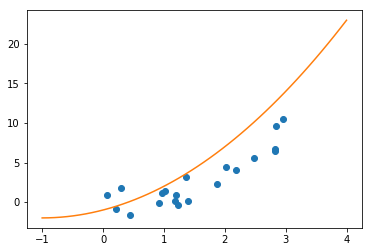

In [6]:

fig,ax = plt.figure(), plt.axes()

X = np.linspace(-1,4)

dataX, dataY = zip(*data)
ax.plot(dataX, dataY, "o")
ax.plot(X, f1(X))

plt.show()

Not bad! But it goes a bit high, let's shift it down in our next guess.

Let's try $f_2(x):=x^2 + 2x - 4$.

In [7]:

f2 = sympy.lambdify([x], x**2 + 2*x - 4)

... and plot our guesses $f_1$ and $f_2$ with our given data:

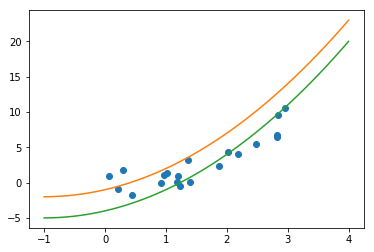

In [8]:
fig,ax = plt.figure(), plt.axes()

X = np.linspace(-1,4)

dataX, dataY = zip(*data)
ax.plot(dataX, dataY, "o")

ax.plot(X, f1(X))
ax.plot(X, f2(X))

plt.show()

Better, but $f_2$'s graph is a bit low on the left.

There must be a better way, rather than guessing!

 Our data is a set of 20 points
 $\mathrm{data} = \{(x_i, y_i) : i \in \{0,1,2,3,...19\} \}$.
 We want to simutaneously MINIMIZE the DISTANCE from the
 data points $(x_i, y_i)$ to the points on the 
 graph of f, i.e., the points $(x_i, f(x_i))$
 For every $i$,  the distance from $(x_i, y_i)$
 to $(x_i, f(x_i))$ is:
 $$\sqrt{ (x_i-x_i)^2+(y_i-f(x_i))^2 }
     =\sqrt{ (y_i-f(x_i))^2}=|y_i-f(x_i)|.$$ 
Minimization? Perhaps we can use calculus? 

The absoulte value $x\mapsto|x|$ is NOT differentiable at zero.
Rather let's use the square of the DISTANCE from the
 data points $(x_i, y_i)$ to the points on the 
 graph of $f$. That is
$$(x_i-x_i)^2+(y_i-f(x_i))^2=(y_i-f(x_i))^2.$$
 This is for one data point, but we want this 
 quantity to be small for all datapoints.

 Lets consider the sum of all these quantities:
 $$\sum_{(x_i,y_i)\in{\mathrm{data}}}(y_i-f(x_i))^2
     =\sum_{(x_i,y_i)\in{\mathrm{data}}}(y_i-(ax_i^2+bx_i+c))^2$$
 If we can find values of a,b,c that makes the 
 above quantity small, as small as possible, we are in business!
 This is now our objective!

 Let's use sympy to compute the above quantity for our 20 
 given data points.     


In [9]:
from sympy.abc import x,a,b,c
import sympy

f = sympy.lambdify([x], a*x**2+ b*x+c)
objective = sum( (y_i - f(x_i))**2 for x_i,y_i in data)

In [10]:
sympy.simplify(objective)

 Notice how this expression is only in the parameters a, b, and c.
 We must find the values a, b, and c for which the objective is a minimum.
 This can only happen where the objective has a critical point,
 i.e., its partial derivatives to a,b,c are simultaneously zero. 
 This will be discussed in more detail in a course on multivariate calculus
 
 (See https://en.wikipedia.org/wiki/Critical_point_(mathematics)#Several_variables)

 I.e., We must solve the following system of three equations:

In [23]:
[   
    sympy.Eq(sympy.diff(objective, a), 0),
    sympy.Eq(sympy.diff(objective, b), 0),
    sympy.Eq(sympy.diff(objective, c), 0), 
]

... call sympy.solve:

In [24]:
parameters = sympy.solve([
    sympy.Eq(sympy.diff(objective, a), 0),
    sympy.Eq(sympy.diff(objective, b), 0),
    sympy.Eq(sympy.diff(objective, c), 0),            
], [a,b,c])

In [25]:
parameters

These are the parameters we want. Let's substiture into $ax^2+bx+c$

In [16]:
fitted_expression = (a*x**2+b*x+c).subs(parameters)
fitted_expression

Let's make a function out of this expression

In [19]:

fitted_f = sympy.lambdify([x], fitted_expression)

... and plot it against our previous guesses and our data:

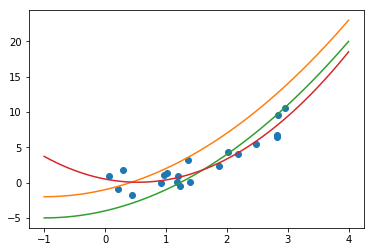

In [22]:

fig,ax = plt.figure(), plt.axes()

X = np.linspace(-1,4)

dataX, dataY = zip(*data)
ax.plot(dataX, dataY, "o")

ax.plot(X, f1(X))
ax.plot(X, f2(X))
ax.plot(X, fitted_f(X))

plt.show()


Notice, that our fitted function closely fits the data, closer than our arbitrary guesses.